# COL3A1

In [5]:
import gpsea
import hpotk

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")


Loaded HPO v2024-08-13
Using genophenocorr version 0.7.1


# COL3A1
We user the [Matched Annotation from NCBI and EMBL-EBI (MANE)](https://www.ncbi.nlm.nih.gov/refseq/MANE/) transcript and the corresponding protein identifier for COL3A1.

In [6]:
gene_symbol = 'COL3A1'
mane_tx_id = 'NM_000090.4'
mane_protein_id = "NP_000081.2" #collagen alpha-1(III) chain preproprotein"

In [7]:
from ppktstore.registry import configure_phenopacket_registry
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

from ppktstore.registry import configure_phenopacket_registry
phenopacket_registry = configure_phenopacket_registry()
with phenopacket_registry.open_phenopacket_store("0.1.21") as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))
len(phenopackets)


cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)

validation.summarize()

Individuals Processed: 100%|██████████| 41/41 [00:00<00:00, 106.92individuals/s]
Validated under permissive policy
No errors or warnings were found


In [8]:
from gpsea.view import CohortViewer
cv = CohortViewer(hpo=hpo)
cv.process(cohort=cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Bruising susceptibility,HP:0000978,29
Dermal translucency,HP:0010648,25
Finger joint hypermobility,HP:0006094,19
Spontaneous pneumothorax,HP:0002108,14
Arterial rupture,HP:0025019,12
Arterial dissection,HP:0005294,11
Gingival fragility,HP:0034518,9
Aortic dissection,HP:0002647,7
Talipes equinovarus,HP:0001762,6
Polymicrogyria,HP:0002126,6


<Axes: title={'center': 'Collagen alpha-1(III) chain\ntranscript: NM_000090.4, protein: NP_000081.2'}>

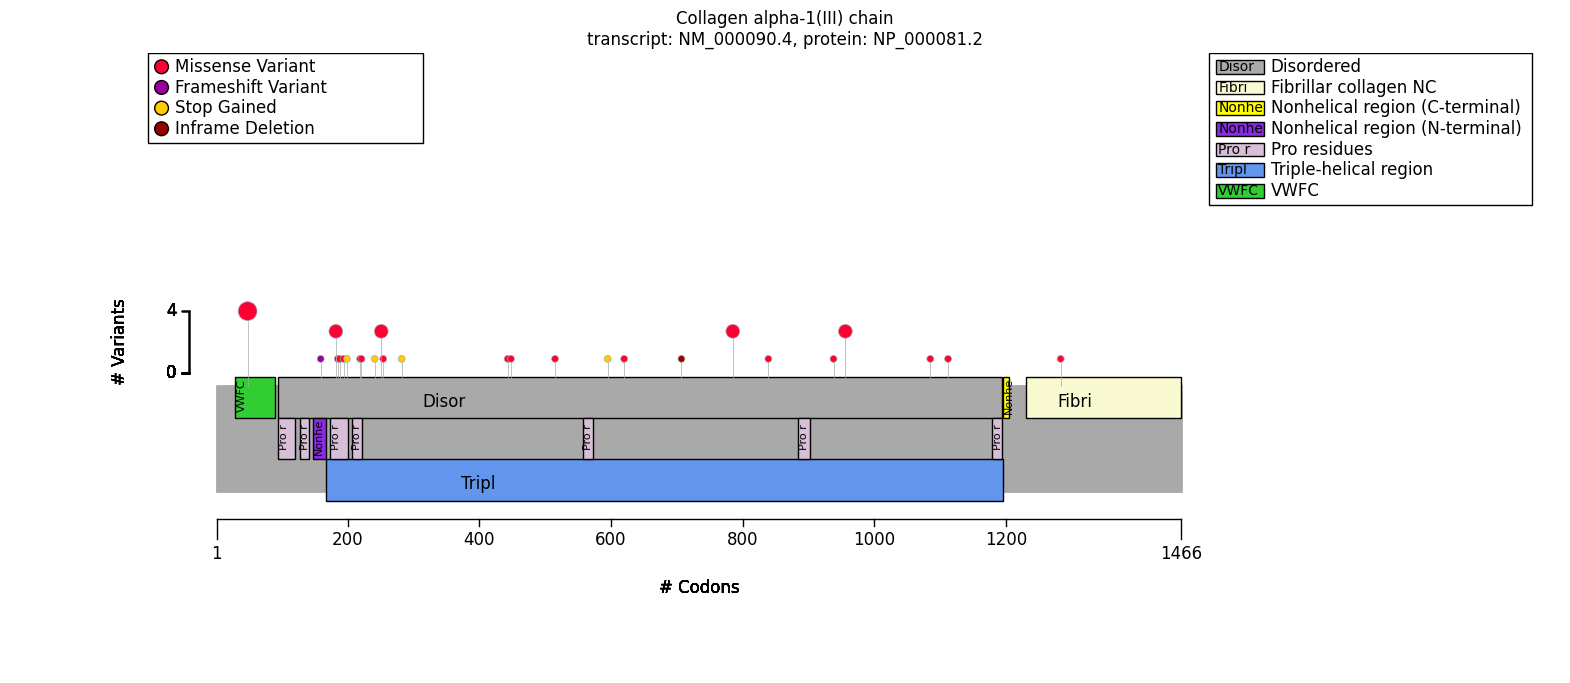

In [9]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import VVMultiCoordinateService, configure_default_protein_metadata_service
from gpsea.model import ProteinMetadata

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(mane_tx_id) 
pms = configure_default_protein_metadata_service()
#protein_meta = pms.annotate(mane_protein_id)
protein_meta = ProteinMetadata.from_uniprot_json(uniprot_json="P02461.json", label="Collagen alpha-1(III) chain", protein_length=1466, protein_id=mane_protein_id)


from gpsea.view import ProteinVisualizable, ProteinVisualizer

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

In [10]:
from gpsea.view import ProteinVariantViewer
viewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
viewer.process(cohort)

Name,Type,Coordinates,Count,Variants
VWFC,DOMAIN,29 - 89,4,p.Pro49Ala
Disordered,REGION,94 - 1194,28,p.Gly195Arg; p.Gly255Trp; p.Gly183Ser; p.Gly786Arg; p.Gly939Ser; p.Arg449Leu; p.Pro712_Gly720del; p.Gly252Ser; p.Gly222Asp; p.Gly1113Asp; p.Gln200Ter; p.Gly252Asp; p.Lys161GlnfsTer45; p.Gly516Trp; p.Arg242Ter; p.Ala220_Ile221del; p.Gly1086Arg; p.Gly444Arg; p.Gly957Val; p.Gly957Ser; p.Gly840Arg; p.Arg596Ter; p.Gly186Ser; p.Gly621Glu; p.Gly189Arg; p.Gly786Glu; p.Leu283Ter
Pro residues,COMPOSITIONAL_BIAS,94 - 120,0,
Pro residues,COMPOSITIONAL_BIAS,127 - 142,0,
Nonhelical region (N-terminal),REGION,148 - 167,1,p.Lys161GlnfsTer45
Triple-helical region,REGION,167 - 1196,27,p.Gly195Arg; p.Gly255Trp; p.Gly183Ser; p.Gly786Arg; p.Gly939Ser; p.Arg449Leu; p.Pro712_Gly720del; p.Gly252Ser; p.Gly222Asp; p.Gly1113Asp; p.Gln200Ter; p.Gly252Asp; p.Gly516Trp; p.Arg242Ter; p.Ala220_Ile221del; p.Gly1086Arg; p.Gly444Arg; p.Gly957Val; p.Gly957Ser; p.Gly840Arg; p.Arg596Ter; p.Gly186Ser; p.Gly621Glu; p.Gly189Arg; p.Gly786Glu; p.Leu283Ter
Pro residues,COMPOSITIONAL_BIAS,173 - 201,6,p.Gly195Arg; p.Gln200Ter; p.Gly186Ser; p.Gly183Ser; p.Gly189Arg
Pro residues,COMPOSITIONAL_BIAS,206 - 222,2,p.Ala220_Ile221del; p.Gly222Asp
Pro residues,COMPOSITIONAL_BIAS,557 - 572,0,
Pro residues,COMPOSITIONAL_BIAS,884 - 902,0,


In [11]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)

Variant key,Variant (cDNA),Variant (protein),Overlapping Exons,Effects,Count
2_188984825_188984825_C_G,c.145C>G,p.Pro49Ala,2,missense,4
2_188988099_188988099_G_A,c.547G>A,p.Gly183Ser,6,missense,2
2_188988605_188988605_C_T,c.598C>T,p.Gln200Ter,7,stop gained,1
2_188998324_188998324_G_C,c.1977+5G>C,None,None,"splice donor 5th base, intronic",1
2_188988117_188988117_G_C,c.565G>C,p.Gly189Arg,6,missense,1
2_188988590_188988590_G_A,c.583G>A,p.Gly195Arg,7,"missense, splice region",1
2_189004303_189004303_G_T,c.2870G>T,p.Gly957Val,40,missense,1
2_188994593_188994593_G_T,c.1346G>T,p.Arg449Leu,19,"missense, splice region",1
2_188989416_188989422_TGCTATA_T,c.659_664del,p.Ala220_Ile221del,8,inframe deletion,1
2_188997382_188997382_G_A,c.1862G>A,p.Gly621Glu,26,missense,1


In [13]:
from gpsea.analysis.pcats import configure_hpo_term_analysis
analysis = configure_hpo_term_analysis(hpo)

from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

In [15]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate
is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, mane_tx_id)
gt_predicate = monoallelic_predicate(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label='Missense', 
    b_label='Other'
)

result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_predicate,
    pheno_predicates=pheno_predicates,
)

from gpsea.view import MtcStatsViewer
mtc_viewer = MtcStatsViewer()
mtc_viewer.process(result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.4,77
HMF03,Skipping term because of a child term with the same individual counts,4
HMF08,Skipping general term,48
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,36


In [16]:
from gpsea.view import summarize_hpo_analysis
summarize_hpo_analysis(hpo, result)

Allele group                                       Missense          Other  \
                                                      Count Percent  Count   
Gingival fragility [HP:0034518]                        3/19     16%   6/12   
Dermal translucency [HP:0010648]                      12/19     63%  11/14   
Bruising susceptibility [HP:0000978]                  15/20     75%  12/14   
Finger joint hypermobility [HP:0006094]               10/19     53%   9/14   
Spontaneous pneumothorax [HP:0002108]                  8/21     38%   6/14   
Small joint hypermobilty [HP:0430046]                 10/10    100%    9/9   
Abnormality of joint mobility [HP:0011729]            10/10    100%    9/9   
Abnormality of hand joint mobility [HP:0006256]       10/10    100%    9/9   
Abnormal finger morphology [HP:0001167]               10/10    100%    9/9   
Abnormal appendicular skeleton morphology [HP:0...    10/10    100%    9/9   
Subcutaneous hemorrhage [HP:0001933]                  15/15    100%  12/12   
Abnormal blood vessel morphology [HP:0033353]         10/10    100%    8/8   

Allele group                                                                   \
                                                   Percent Corrected p values   
Gingival fragility [HP:0034518]                        50%           0.674278   
Dermal translucency [HP:0010648]                       79%           1.000000   
Bruising susceptibility [HP:0000978]                   86%           1.000000   
Finger joint hypermobility [HP:0006094]                64%           1.000000   
Spontaneous pneumothorax [HP:0002108]                  43%           1.000000   
Small joint hypermobilty [HP:0430046]                 100%           1.000000   
Abnormality of joint mobility [HP:0011729]            100%           1.000000   
Abnormality of hand joint mobility [HP:0006256]       100%           1.000000   
Abnormal finger morphology [HP:0001167]               100%           1.000000   
Abnormal appendicular skeleton morphology [HP:0...    100%           1.000000   
Subcutaneous hemorrhage [HP:0001933]                  100%           1.000000   
Abnormal blood vessel morphology [HP:0033353]         100%           1.000000   

Allele group                                                  
                                                    p values  
Gingival fragility [HP:0034518]                     0.056190  
Dermal translucency [HP:0010648]                    0.455080  
Bruising susceptibility [HP:0000978]                0.672174  
Finger joint hypermobility [HP:0006094]             0.722801  
Spontaneous pneumothorax [HP:0002108]               1.000000  
Small joint hypermobilty [HP:0430046]               1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormality of hand joint mobility [HP:0006256]     1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000

In [21]:
from gpsea.model.genome import Region
#is_triple = VariantPredicates.protein_feature_type(feature_type=,
#                                                   protein_metadata=protein_meta)

# 167 - 1196
is_triple = VariantPredicates.region(region=Region(start=167, end=1196), tx_id=mane_tx_id)

th_predicate = monoallelic_predicate(
    a_predicate=is_triple,
    b_predicate=~is_triple,
    a_label='is_triple', 
    b_label='Other'
)

result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=th_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo, result)


Allele group                                       is_triple         Other  \
                                                       Count Percent Count   
Dermal translucency [HP:0010648]                       15/24     62%   8/9   
Finger joint hypermobility [HP:0006094]                12/24     50%   7/9   
Spontaneous pneumothorax [HP:0002108]                   9/26     35%   5/9   
Bruising susceptibility [HP:0000978]                   19/25     76%   8/9   
Small joint hypermobilty [HP:0430046]                  12/12    100%   7/7   
Abnormality of joint mobility [HP:0011729]             12/12    100%   7/7   
Abnormality of hand joint mobility [HP:0006256]        12/12    100%   7/7   
Abnormal finger morphology [HP:0001167]                12/12    100%   7/7   
Abnormal appendicular skeleton morphology [HP:0...     12/12    100%   7/7   
Subcutaneous hemorrhage [HP:0001933]                   19/19    100%   8/8   
Abnormal blood vessel morphology [HP:0033353]          14/14    100%   4/4   

Allele group                                                                   \
                                                   Percent Corrected p values   
Dermal translucency [HP:0010648]                       89%                1.0   
Finger joint hypermobility [HP:0006094]                78%                1.0   
Spontaneous pneumothorax [HP:0002108]                  56%                1.0   
Bruising susceptibility [HP:0000978]                   89%                1.0   
Small joint hypermobilty [HP:0430046]                 100%                1.0   
Abnormality of joint mobility [HP:0011729]            100%                1.0   
Abnormality of hand joint mobility [HP:0006256]       100%                1.0   
Abnormal finger morphology [HP:0001167]               100%                1.0   
Abnormal appendicular skeleton morphology [HP:0...    100%                1.0   
Subcutaneous hemorrhage [HP:0001933]                  100%                1.0   
Abnormal blood vessel morphology [HP:0033353]         100%                1.0   

Allele group                                                  
                                                    p values  
Dermal translucency [HP:0010648]                    0.216638  
Finger joint hypermobility [HP:0006094]             0.240922  
Spontaneous pneumothorax [HP:0002108]               0.431768  
Bruising susceptibility [HP:0000978]                0.644458  
Small joint hypermobilty [HP:0430046]               1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormality of hand joint mobility [HP:0006256]     1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000

In [22]:
from gpsea.analysis.predicate.genotype import diagnosis_predicate
dx_predicate = diagnosis_predicate(
    diagnoses=('OMIM:130050', 'OMIM:618343'),
    labels=('Ehlers-Danlos syndrome, vascular type', 'Polymicrogyria with or without vascular-type EDS'),
)
dx_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=dx_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo, dx_result)




Diagnosis                                          OMIM:130050          \
                                                         Count Percent   
Small joint hypermobilty [HP:0430046]                    19/19    100%   
Finger joint hypermobility [HP:0006094]                  19/33     58%   
Dermal translucency [HP:0010648]                         23/33     70%   
Talipes equinovarus [HP:0001762]                          4/32     12%   
Bruising susceptibility [HP:0000978]                     27/34     79%   
Joint hypermobility [HP:0001382]                         19/19    100%   
Abnormality of joint mobility [HP:0011729]               19/19    100%   
Abnormal finger morphology [HP:0001167]                  19/19    100%   
Abnormal appendicular skeleton morphology [HP:0...       19/19    100%   
Subcutaneous hemorrhage [HP:0001933]                     27/27    100%   
Abnormal systemic arterial morphology [HP:0011004]       16/16    100%   
Abnormal blood vessel morphology [HP:0033353]            18/18    100%   

Diagnosis                                          OMIM:618343          \
                                                         Count Percent   
Small joint hypermobilty [HP:0430046]                      2/5     40%   
Finger joint hypermobility [HP:0006094]                    0/3      0%   
Dermal translucency [HP:0010648]                           2/6     33%   
Talipes equinovarus [HP:0001762]                           2/5     40%   
Bruising susceptibility [HP:0000978]                       2/4     50%   
Joint hypermobility [HP:0001382]                           2/2    100%   
Abnormality of joint mobility [HP:0011729]                 2/2    100%   
Abnormal finger morphology [HP:0001167]                    1/1    100%   
Abnormal appendicular skeleton morphology [HP:0...         1/1    100%   
Subcutaneous hemorrhage [HP:0001933]                       2/2    100%   
Abnormal systemic arterial morphology [HP:0011004]         1/1    100%   
Abnormal blood vessel morphology [HP:0033353]              2/2    100%   

Diagnosis                                                              \
                                                   Corrected p values   
Small joint hypermobilty [HP:0430046]                        0.059289   
Finger joint hypermobility [HP:0006094]                      0.531291   
Dermal translucency [HP:0010648]                             0.531291   
Talipes equinovarus [HP:0001762]                             0.531291   
Bruising susceptibility [HP:0000978]                         0.558521   
Joint hypermobility [HP:0001382]                             1.000000   
Abnormality of joint mobility [HP:0011729]                   1.000000   
Abnormal finger morphology [HP:0001167]                      1.000000   
Abnormal appendicular skeleton morphology [HP:0...           1.000000   
Subcutaneous hemorrhage [HP:0001933]                         1.000000   
Abnormal systemic arterial morphology [HP:0011004]           1.000000   
Abnormal blood vessel morphology [HP:0033353]                1.000000   

Diagnosis                                                     
                                                    p values  
Small joint hypermobilty [HP:0430046]               0.004941  
Finger joint hypermobility [HP:0006094]             0.095238  
Dermal translucency [HP:0010648]                    0.162585  
Talipes equinovarus [HP:0001762]                    0.177097  
Bruising susceptibility [HP:0000978]                0.232717  
Joint hypermobility [HP:0001382]                    1.000000  
Abnormality of joint mobility [HP:0011729]          1.000000  
Abnormal finger morphology [HP:0001167]             1.000000  
Abnormal appendicular skeleton morphology [HP:0...  1.000000  
Subcutaneous hemorrhage [HP:0001933]                1.000000  
Abnormal systemic arterial morphology [HP:0011004]  1.000000  
Abnormal blood vessel morphology [HP:0033353]       1.000000